In [1]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Завантаження файлу movies.dat
movies = pd.read_csv('C:/ida/movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='latin1')


In [7]:
# Завантаження файлу ratings.dat
ratings = pd.read_csv('C:/ida/ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])


In [8]:
# Завантаження файлу users.dat
users = pd.read_csv('C:/ida/users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

In [9]:
# Перетворення Timestamp у формат дати та часу
ratings['Datetime'] = pd.to_datetime(ratings['Timestamp'], unit='s')

In [10]:
# Злиття даних за допомогою зовнішнього злиття (outer merge)
merged_data = pd.merge(pd.merge(ratings, users, on='UserID', how='outer'), movies, on='MovieID', how='outer')

In [11]:
# Виведення перших рядків об'єднаного DataFrame
print(merged_data.head())

   UserID  MovieID  Rating    Timestamp            Datetime Gender   Age  \
0     1.0     1193     5.0  978300760.0 2000-12-31 22:12:40      F   1.0   
1     2.0     1193     5.0  978298413.0 2000-12-31 21:33:33      M  56.0   
2    12.0     1193     4.0  978220179.0 2000-12-30 23:49:39      M  25.0   
3    15.0     1193     4.0  978199279.0 2000-12-30 18:01:19      M  25.0   
4    17.0     1193     5.0  978158471.0 2000-12-30 06:41:11      M  50.0   

   Occupation Zip-code                                   Title Genres  
0        10.0    48067  One Flew Over the Cuckoo's Nest (1975)  Drama  
1        16.0    70072  One Flew Over the Cuckoo's Nest (1975)  Drama  
2        12.0    32793  One Flew Over the Cuckoo's Nest (1975)  Drama  
3         7.0    22903  One Flew Over the Cuckoo's Nest (1975)  Drama  
4         1.0    95350  One Flew Over the Cuckoo's Nest (1975)  Drama  


In [12]:
# Групування за статтю та віком, обчислення середнього рейтингу
grouped_data = merged_data.groupby(['Gender', 'Age', 'Title']).agg({'Rating': 'mean'}).reset_index()
print(grouped_data.head())

  Gender  Age                              Title    Rating
0      F  1.0               'Night Mother (1986)  3.000000
1      F  1.0          'Til There Was You (1997)  2.000000
2      F  1.0  10 Things I Hate About You (1999)  4.035714
3      F  1.0              101 Dalmatians (1961)  3.812500
4      F  1.0              101 Dalmatians (1996)  3.470588


In [13]:
# Отримання топ-10 стрічок за рейтингом для кожного полу та вікової групи
top_movies_by_gender_age = grouped_data.groupby(['Gender', 'Age']).apply(lambda x: x.nlargest(10, 'Rating')).reset_index(drop=True)
print(top_movies_by_gender_age)

    Gender   Age                                              Title  Rating
0        F   1.0                                       8 1/2 (1963)     5.0
1        F   1.0  Adventures of Buckaroo Bonzai Across the 8th D...     5.0
2        F   1.0               Adventures of Robin Hood, The (1938)     5.0
3        F   1.0                                  Affliction (1997)     5.0
4        F   1.0                                       Akira (1988)     5.0
..     ...   ...                                                ...     ...
135      M  56.0                          Better Off Dead... (1985)     5.0
136      M  56.0                       Better Than Chocolate (1999)     5.0
137      M  56.0                                 Boys Life 2 (1997)     5.0
138      M  56.0                                     Careful (1992)     5.0
139      M  56.0                                      Carmen (1984)     5.0

[140 rows x 4 columns]


In [14]:
# Вибір даних для жінок вікової групи 1
data_women_age1 = top_movies_by_gender_age[(top_movies_by_gender_age['Gender'] == 'F') & (top_movies_by_gender_age['Age'] == 1)]
print(data_women_age1)

  Gender  Age                                              Title  Rating
0      F  1.0                                       8 1/2 (1963)     5.0
1      F  1.0  Adventures of Buckaroo Bonzai Across the 8th D...     5.0
2      F  1.0               Adventures of Robin Hood, The (1938)     5.0
3      F  1.0                                  Affliction (1997)     5.0
4      F  1.0                                       Akira (1988)     5.0
5      F  1.0                                       Alive (1993)     5.0
6      F  1.0                          American History X (1998)     5.0
7      F  1.0                                     Amistad (1997)     5.0
8      F  1.0  And Now for Something Completely Different (1971)     5.0
9      F  1.0                      And the Band Played On (1993)     5.0


In [15]:
# Вибір даних для чоловіків вікової групи 45
data_men_age45 = top_movies_by_gender_age[(top_movies_by_gender_age['Gender'] == 'M') & (top_movies_by_gender_age['Age'] == 45)]
print(data_men_age45)

    Gender   Age                                              Title  Rating
110      M  45.0                                      Angela (1995)     5.0
111      M  45.0  Ballad of Narayama, The (Narayama Bushiko) (1958)     5.0
112      M  45.0              Before the Rain (Pred dozhdot) (1994)     5.0
113      M  45.0                              Broken English (1996)     5.0
114      M  45.0                               Bye Bye, Love (1995)     5.0
115      M  45.0  Ciao, Professore! (Io speriamo che me la cavo ...     5.0
116      M  45.0               Clean Slate (Coup de Torchon) (1981)     5.0
117      M  45.0                            Double Happiness (1994)     5.0
118      M  45.0                 Draughtsman's Contract, The (1982)     5.0
119      M  45.0                       Dream With the Fishes (1997)     5.0


C:\Users\Дмитро\AppData\Local\Temp\ipykernel_6224\3812108981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Title', data=data_women_age1, palette='viridis')


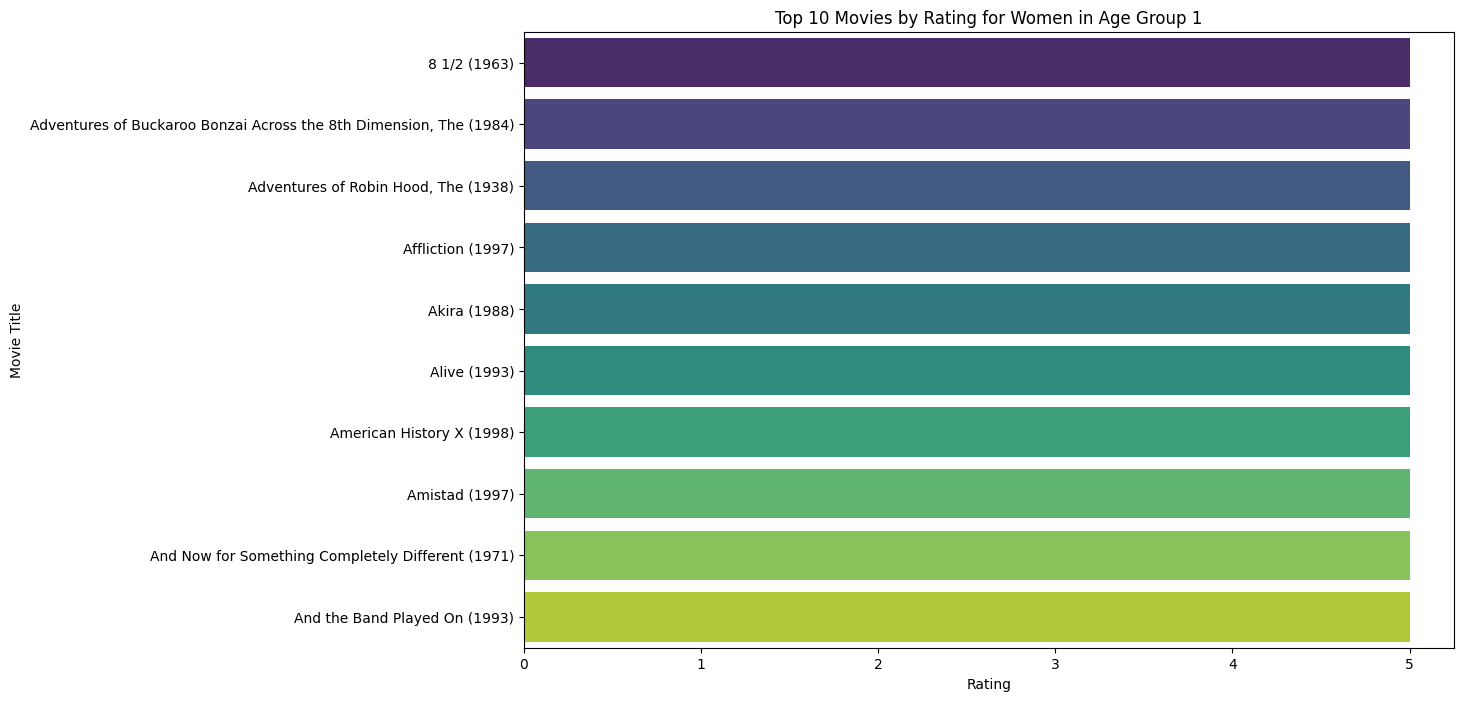

In [16]:
# Побудова стовпчикової діаграми
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Title', data=data_women_age1, palette='viridis')
plt.title('Top 10 Movies by Rating for Women in Age Group 1')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()